[source](https://github.com/benalexkeen/Introduction-to-linear-programming)

## Introduction to Linear Programming with Python

In this set of notebooks we will be looking at some linear programming problems and how we can construct and solve these problems using the python linear programming package PuLP.

Let's start with a simple example:

We want to find the maximum solution to:

Z = 4x + 3y

This is known as our objective function. x and y in this equation are our decision variables.

In this example, the objective function is subject to the following constraints:

x ≥ 0

y ≥ 2

2y ≤ 25 - x

4y ≥ 2x - 8

y ≤ 2x - 5

We'll begin by graphing this problem


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


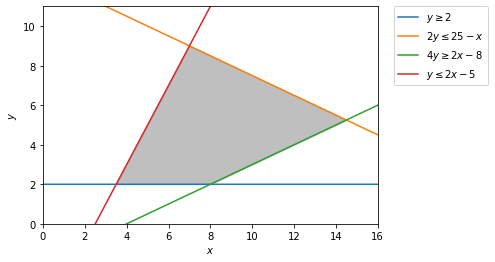

In [3]:

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [3]:
x = np.linspace(0, 20, 2000)
x

array([0.00000000e+00, 1.00050025e-02, 2.00100050e-02, ...,
       1.99799900e+01, 1.99899950e+01, 2.00000000e+01])

## see solution on example page

## Introduction to PuLP



In [2]:
import pulp

Instantiate the problem class, we'll name it "My LP problem" and we're looking for an optimal maximum so we use LpMaximize

In [5]:
my_lp_problem = pulp.LpProblem("My_LP_Problem", pulp.LpMaximize)

Decision variables using the LpVariable class. In our example, x had a lower bound of 0 and y had a lower bound of 2.

Upper bounds can be assigned using the upBound parameter.

In [6]:
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')

The objective function and constraints are added using the += operator to our model.

The objective function is added first, then the individual constraints.

In [7]:
# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

In [8]:
# Constraints
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem += y <= 2 * x - 5

In [9]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

----

PuLP supports open source linear programming solvers such as CBC and GLPK, as well as commercial solvers such as Gurobi and IBM's CPLEX.

The default solver is CBC, which comes packaged with PuLP upon installation.

For most applications, the open source CBC from COIN-OR will be enough for most simple linear programming optimisation algorithms.